# **Sobre o notebook**

Aproveite esse espaço para as atividades do curso de **Estatística com R: resumindo e analisando dados** da Alura. Aqui você pode escrever e testar os códigos dos diversos exercícios do **Mão na Massa** envolvendo os aprendizados de cada aula.

Utilizando os conhecimentos adquiridos ao longo do curso, você precisará realizar uma **análise descritiva** básica de um conjunto de dados retirados da **Pesquisa Nacional por Amostra de Domicílios - 2015** do IBGE.

Nele, você irá avaliar os tipos dos dados e suas distribuições, calcular as medidas de tendência central, medidas separatrizes e de dispersão dos dados e construirá visuais como histogramas, boxplot, entre outras para responder às perguntas.

Este notebook foi construído com espaços para adicionar as células dos desafios propostos no curso, com eles você tem espaço para construir e executar suas soluções.





## **Dataset do Projeto**

O conjunto de dados que será explorado aqui é uma adaptação dos dados da **Pesquisa Nacional por Amostra de Domicílios - PNAD**. Ela investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas.

O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### **Fonte dos Dados**

https://www.ibge.gov.br/estatisticas/sociais/populacao/9127-pesquisa-nacional-por-amostra-de-domicilios.html?edicao=9128

### **Variáveis do dataset**

> ### UF
> ***

Unidade federativa da pessoa responsável

> ### Sexo
> ***

Sexo biológico da pessoa responsável

<br>

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Idade
> ***

Idade da pessoa responsável na data de referência em anos.

> ### Cor
> ***

Cor ou raça da pessoa responsável com base na autodeclaração

<br>

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|

> ### Anos de Estudo
> ***

Anos de estudo da pessoa responsável

<br>

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados|

> ### Renda
> ***

Rendimento mensal do trabalho principal da pessoa responsável para 10 anos ou mais de idade.

> ### Altura (elaboração própria - dado sintético)
> ***

Altura da pessoa responsável em metros.

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a **Renda** era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a **Renda** era missing;
> 3. Foram considerados somente os registros das **Pessoas de Referência** de cada domicílio (responsável pelo domicílio).

## **Aula 01 - Entendendo os dados**

### **Mão na Massa - Explorando novos dados**




Você está treinando para ser uma pessoa cientista de dados e recebeu a demanda de investigar os dados da PNAD de 2015. A fim de testar as suas habilidades de análise de dados e os conceitos da estatística descritiva, responda às perguntas ao longo do notebook compartilhado.

#### **Importando os pacotes e configurando o ambiente**

In [2]:
# Importando os pacotes do projeto
library(tidyverse)
library(glue)

# Perimitindo no máximo 20 linhas para exibição do dado
options(repr.matrix.max.rows = 30)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
# Definindo as dimensões dos gráficos gerados
options(repr.plot.width = 12, repr.plot.height = 8)

# Definindo um tema básico para gráficos do ggplot
tema <- theme(
        plot.title=element_text(size = 22, hjust = 0.5),
        axis.title.y=element_text(size = 16, vjust = +0.2),
        axis.title.x=element_text(size = 16, vjust = -0.2),
        axis.text.y=element_text(size = 14),
        axis.text.x=element_text(size = 14))

#### **Importe o dataset e armazene o conteúdo em um DataFrame**

**Dica:** Passe a url para a função que lê um arquivo do tipo `.csv`

In [4]:
url <- "https://raw.githubusercontent.com/afonsosr2/estatistica-r-frequencias-medidas/refs/heads/main/dados/dados_desafio.csv"
dados <- read.csv(url)

#### **Visualize o conteúdo do DataFrame e leia as infos sobre os dados (linhas, colunas, tipos)**

**Dica:** Para observar as infos dos dados, utilize a função `glimpse` ou `str`

In [5]:
head(dados)

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura
,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,Rondônia,0,23,8,12,800,1.60
2,Rondônia,1,23,2,12,1150,1.74
3,Rondônia,1,35,8,15,880,1.76
4,Rondônia,0,46,2,6,3500,1.78
5,Rondônia,1,47,8,9,150,1.69
6,Rondônia,1,34,8,12,790,1.64


In [6]:
glimpse(dados)

Rows: 76,840
Columns: 7
$ UF             <chr> "Rondônia", "Rondônia", "Rondônia", "Rondônia", "Rondôn…
$ Sexo           <int> 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0…
$ Idade          <int> 23, 23, 35, 46, 47, 34, 57, 60, 50, 26, 46, 49, 52, 38,…
$ Cor            <int> 8, 2, 8, 2, 8, 8, 8, 8, 4, 8, 8, 8, 2, 8, 2, 2, 8, 8, 2…
$ Anos.de.Estudo <int> 12, 12, 15, 6, 9, 12, 12, 12, 14, 12, 12, 6, 6, 12, 12,…
$ Renda          <int> 800, 1150, 880, 3500, 150, 790, 3150, 1700, 1800, 1150,…
$ Altura         <dbl> 1.60, 1.74, 1.76, 1.78, 1.69, 1.64, 1.57, 1.61, 1.78, 1…


#### **Explore brevemente a variável `UF` e investigue quantos dados possuímos para cada estado**

**Dica:** Para explorar, utilize as funções `select`, `distinct`, `count` e `geom_col`

In [7]:
dados %>%
  select(UF)

UF
<chr>
Rondônia
Rondônia
Rondônia
Rondônia
Rondônia
Rondônia
Rondônia
Rondônia
Rondônia


In [8]:
dados %>%
  distinct(UF)

UF
<chr>
Rondônia
Acre
Amazonas
Roraima
Pará
Amapá
Tocantins
Maranhão
Piauí


In [9]:
registros_uf <- dados %>%
  count(UF, sort=T)

registros_uf

UF,n
<chr>,<int>
São Paulo,8544
Minas Gerais,7686
Rio Grande do Sul,6322
Bahia,5717
Rio de Janeiro,5556
Pará,4449
Paraná,4356
Pernambuco,3820
Goiás,3478


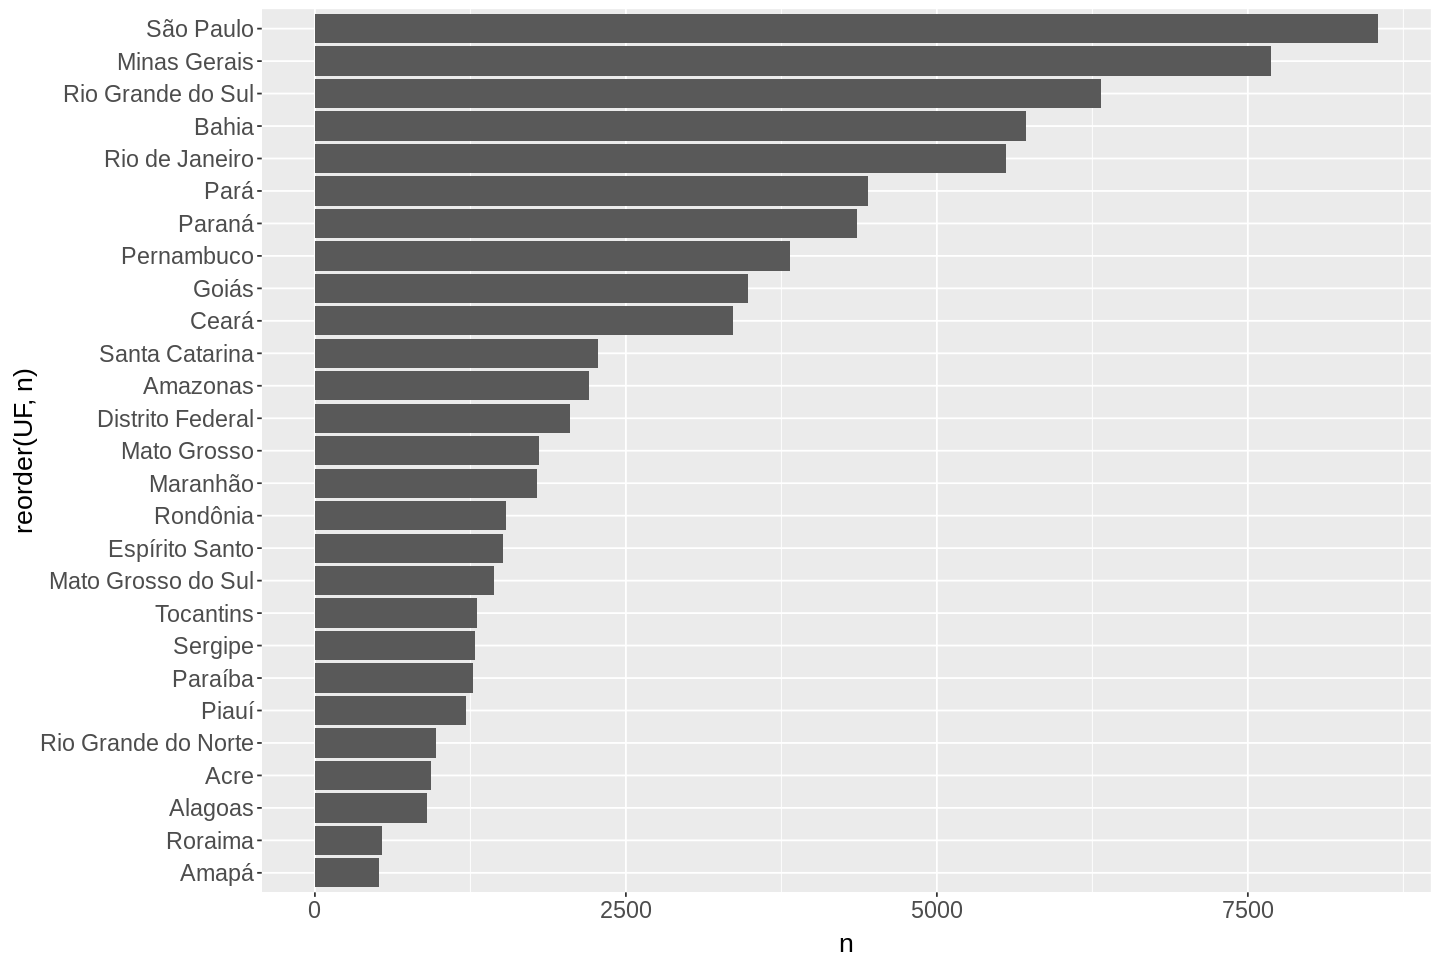

In [10]:
ggplot(registros_uf) +
  geom_col(aes(x = n, y = reorder(UF, n))) + tema

#### **Transforme as variáveis `Sexo`, `Cor` e `Anos.de.Estudo` em factor e observe o resultado**

**Dica 1:** Para te auxiliar neste processo, a célula abaixo traz os vetores com os valores de cada coluna na ordem desejada.

**Dica 2:** Utilize a tabela no início do documento para fazer a relação dos valores atuais para os desejados.

In [11]:
sexo = c(
    'Masculino',
    'Feminino'
)
cor = c(
    'Indígena',
    'Branca',
    'Preta',
    'Amarela',
    'Parda'
)
anos_de_estudo = c(
    'Sem instrução e menos de 1 ano',
    '1 ano',
    '2 anos',
    '3 anos',
    '4 anos',
    '5 anos',
    '6 anos',
    '7 anos',
    '8 anos',
    '9 anos',
    '10 anos',
    '11 anos',
    '12 anos',
    '13 anos',
    '14 anos',
    '15 anos ou mais',
    'Não determinados'
)

In [12]:
head(dados,3)

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura
,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,Rondônia,0,23,8,12,800,1.60
2,Rondônia,1,23,2,12,1150,1.74
3,Rondônia,1,35,8,15,880,1.76


##### Sexo

In [13]:
dados <- dados %>%
  mutate(Cat.Sexo = factor(Sexo,
                           levels = c(0,1),
                           labels = sexo))

In [14]:
dados %>%
  distinct(Sexo, Cat.Sexo) %>%
  arrange(Cat.Sexo)

Sexo,Cat.Sexo
<int>,<fct>
0,Masculino
1,Feminino


##### Cor

In [15]:
dados <- dados %>%
  mutate(Cat.Cor = factor(Cor,
                           levels = c(0, 2, 4, 6, 8),
                           labels = cor))

In [16]:
dados %>%
  distinct(Cor, Cat.Cor) %>%
  arrange(Cat.Cor)

Cor,Cat.Cor
<int>,<fct>
0,Indígena
2,Branca
4,Preta
6,Amarela
8,Parda


### Anos de Estudo

**Dica 3:** Para criar um vetor que representa uma sequência de números, utilize a notação `c(valor_inicial:valor_final)`.

Exemplo: `c(1:5)` gera o vetor (1, 2, 3, 4, 5).

In [17]:
dados <- dados %>%
  mutate(Cat.Anos.de.Estudo = factor(Anos.de.Estudo,
                           levels = c(1:17),
                           labels = anos_de_estudo))

In [18]:
dados %>%
  distinct(Anos.de.Estudo, Cat.Anos.de.Estudo) %>%
  arrange(Cat.Anos.de.Estudo)

Anos.de.Estudo,Cat.Anos.de.Estudo
<int>,<fct>
1,Sem instrução e menos de 1 ano
2,1 ano
3,2 anos
4,3 anos
5,4 anos
6,5 anos
7,6 anos
8,7 anos
9,8 anos


In [19]:
head(dados,3)

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,Cat.Sexo,Cat.Cor,Cat.Anos.de.Estudo
,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<fct>,<fct>,<fct>
1,Rondônia,0,23,8,12,800,1.60,Masculino,Parda,11 anos
2,Rondônia,1,23,2,12,1150,1.74,Feminino,Branca,11 anos
3,Rondônia,1,35,8,15,880,1.76,Feminino,Parda,14 anos


#### **Apresente em texto a menor e maior `Renda` da base de dados**

**Dica:** A renda é uma medida discreta. Para formatar o texto com `glue` para separação milhar dos dados use a função `format` da seguinte forma:

```format(variavel_desejada, big.mark = ',')```

In [20]:
glue("A menor Renda da base de dados é de R$ {min(dados$Renda)} e a maior é de R$ {format(max(dados$Renda), big.mark = ',')}")

A menor Renda da base de dados é de R$ 0 e a maior é de R$ 200,000

## **Aula 02 - Identificando o perfil do público**

### **Mão na Massa - Analisando o perfil das pessoas responsáveis**

Vamos prosseguir no treinamento, agora identificando o perfil das pessoas responsáveis pelo domicílio de acordo com os dados da PNAD de 2015. Responda às perguntas abaixo e reflita sobre os achados.

#### **Construa uma tabela de frequências das pessoas responsáveis pelo domicílio por `Cat.Sexo`. Adicione também uma coluna com esse valor em porcentagem.**

In [ ]:
head(dados, 3)

In [ ]:
freq_sexo <- ...

freq_sexo

In [ ]:
freq_sexo <- ...

freq_sexo

In [ ]:
colnames(freq_sexo) <- c("Sexo", "Quantidade", "Porcentagem (%)")
freq_sexo

#### **Construa uma tabela de frequências absolutas e outra de relativas cruzando as variáveis `Cat.Sexo` e `Cat.Cor` das pessoas responsáveis pelo domicílio.**

In [ ]:
dist_freq <- ...

dist_freq

**Dica:** Diferentemente da aula, continuaremos utilizando o `mutate(across())`, porém para cada valor que temos (`.`) dividiremos pela quantidade total de dados (`nrow(dados)`), pois queremos a porcentagem relativa relacionando todas as variáveis. Logo a função seria da seguinte forma:

```~ round(. * 100 / nrow(dados), 2)```

Lembre-se de só selecionar as colunas numéricas para este cálculo

In [ ]:
dist_freq_relativa <- ...

dist_freq_relativa

> #### Conclusões

Escreva suas conclusões aqui...

#### **Construa uma tabela cruzada para calcular a `Renda` média das pessoas responsáveis pelo domicílio em relação ao `Cat.Sexo` e `Cat.Cor`.**

In [ ]:
renda_media <- ...

renda_media

#### **Transforme o resultado anterior em uma matriz**

**Dica:** Para transformar em matriz tire a coluna com os dados do sexo biológico antes de usar a função `as.matrix` e adicione as posteriormente com o rownames

In [ ]:
freq_sexo_matrix <- as.matrix(... )
rownames(freq_sexo_matrix) <- ...
freq_sexo_matrix

> #### Conclusões

Escreva suas conclusões aqui...

## **Aula 03 - Analisando a tendência dos dados**

### **Mão na Massa - Analisando a renda das pessoas responsáveis**

Nesta etapa do treinamento, vamos analisar mais dados das pessoas responsáveis pelo domicílio de acordo com os dados da PNAD de 2015, focando na renda e na variável que criamos com as suas alturas. Responda às perguntas abaixo e reflita sobre os achados.

#### **Calcule as medidas de tendência central (média, mediana e moda) para a variável `Renda`**

#### **Crie um gráfico de barras do Top 5 estados pela médias de `Renda`**

**Dica:** Para conseguir apresentar apenas os Top 5 estados utilize após o agrupamento dos dados pela média a função [`slice_max()`](https://dplyr.tidyverse.org/reference/slice.html) passando como variáveis a coluna que deseja contar essa ordem e quantos valores apresentar.

Exemplo: `slice_max(media_idade, n = 3)` seleciona as linhas com os 3 maiores valores da variável `media_idade`.

In [ ]:
head(dados, 3)

In [ ]:
Top5_renda <- ...

Top5_renda

In [ ]:
ggplot() +
  ... +
  tema

> #### Conclusões

Escreva suas conclusões aqui...

#### **Construa 3 tabelas cruzadas calculando a média, mediana e valores máximos de `Renda` relacionando as pessoas responsáveis por estado da Região Sudeste (`UF`) e por `Cat.Sexo`**

In [ ]:
dados_sudeste <- ...

head(dados_sudeste, 3)

##### **Média**

In [ ]:
renda_media <- ...

renda_media

##### **Mediana**

In [ ]:
renda_mediana <- ...

renda_mediana

##### **Renda Máxima**

In [ ]:
renda_max <- ...

renda_max

> #### Conclusões

Escreva suas conclusões aqui...

#### **Construa 2 histogramas com curva de densidade com os valores das colunas `Altura` e `Idade` de todas as pessoas responsáveis e compare as curvas obtidas com as suas  MTCs**

##### **Altura**

In [ ]:
ggplot(..., aes(x = ... , y = ... )) +
  ... +
  ... +
  labs(title = "Distribuição das alturas das pessoas responsáveis pelo domicílio", x = "Altura (metros)", y = "Densidade") +
  tema

In [ ]:
altura_resumo <- ...

altura_resumo

> #### Conclusões

Escreva suas conclusões aqui...

##### **Idade**

In [ ]:
ggplot( ... , aes(x = ... , y = ... )) +
  ... +
  ... +
  labs(title = "Distribuição das idades das pessoas responsáveis pelo domicílio", x = "Idade (metros)", y = "Densidade") +
  tema

In [ ]:
idade_resumo <- ...

idade_resumo

> #### Conclusões

Escreva suas conclusões aqui...

## **Aula 04 - Investigando os dados dos colaboradores**

### **Mão na Massa - Analisando as rendas e suas divisões**

Nesta etapa do treinamento, vamos analisar os dados das pessoas responsáveis pelo domicílio de acordo com os dados da PNAD de 2015, por meio das medidas separatrizes. Responda às perguntas abaixo e reflita sobre os achados.


#### **Calcule o número de classes para `Renda` até R$15.000 utilizando a regra de Sturges**

$$k = 1 + \frac {10}{3}\log_{10}n$$

onde,

$k$ = número de classes

$n$ = número de observações.


In [43]:
renda_15k <- ...

In [ ]:
n <- ...
n

In [ ]:
k <- ...
k

In [ ]:
k <- round(k)
k

#### **Crie o histograma da `Renda` das pessoas responsáveis até R$15.000 seguindo o número de classes calculado anteriormente**

> **Observação:** Ao rodar o código para dividir os dados em faixas é possível que você observe o limite inferior da 1ª faixa com um valor negativo. Isto porque a *Regra de Sturges* define o intervalo mínimo da 1ª classe pela seguinte fórmula: $min(Renda) - (max(Renda) - min(Renda)) * 0.001$.



In [ ]:
faixas <- ...

head(faixas)

In [ ]:
tabela_frequencias <- ...

tabela_frequencias

In [ ]:
ggplot(... , aes(x = ... )) +
  ... +
  labs(title = "Histograma das rendas das pessoas responsáveis pelo domicílio", x = "Renda (R$)", y = "Frequência") +
  tema

> #### Conclusões

Escreva suas conclusões aqui...

#### **Responda as seguintes questões sobre o nosso dataset completo utilizando os conceitos que estudamos até aqui:**

##### **1. Qual o percentual de pessoas responsáveis que ganhava até um salário mínimo em 2015 (R$ 788,00)?**



##### **2. Qual a renda máxima de 95% das pessoas responsáveis na pesquisa?**


##### **3.   Qual a renda mínima dos 1% mais bem pagos da pesquisa?**

##### **4. Qual a renda máxima de 25%, 50% e 75% das pessoas responsáveis que receberam até R$ 6.000 de rendimento mensal? Construa o boxplot e traga o resumo desses dados.**


In [53]:
renda_6k <- ...

In [ ]:
ggplot(... , aes(x= ... )) +
  ... +
  ... +
  ggtitle("Boxplot de Renda das pessoas responsáveis pelo domicílio") +
  xlab("Renda (R$)") +
  scale_y_continuous(lim = c(-0.75, 0.75)) +
  tema

> #### Conclusões

Escreva suas conclusões aqui...

#### **Construa o boxplot da `Renda` até o percentil 95% (`renda_6k`) das pessoas responsáveis por `Cat.Sexo` e `Cat.Cor`. Interprete o resultado.**

**Dica:** Para incluir uma 3ª variável na construção de um boxplot, utilize o parâmetro `fill` da seguinte maneira: `aes(x = Renda, y = Cat.Cor, fill = Cat.Sexo)`.

In [ ]:
ggplot(... , aes(x = ... , y = ... , fill = ... )) +
    ... +
    ggtitle('Boxplot da Renda das pessoas responsáveis por sexo biológico e cor/raça') +
    xlab("Renda (R$)") +
    ylab("Cor ou Raça") +
    tema

#### **Qual a idade limite para 20% da população? Construa o histograma acumulado com curva de densidade, definindo a idade limite e quantas pessoas se encaixam nessa porcentagem.**

**Dica:** Para ler os últimos valores de um DataFrame utilize a função `tail()`.

Exemplo: `tail(df, 3)` lê os ultimos 3 registros do DataFrame `df`.

In [ ]:
ggplot(..., aes(x = ...)) +
  geom_histogram(aes(y = ... ), bins=10, alpha = 0.6) +
  geom_freqpoly(aes(y = ... ), color = "red" ) +
  geom_hline(yintercept = ... , linetype = "dashed", color = "blue") +
  labs(title = "Distribuição percentual acumulada das idades", x = "Idade", y = "Percentual Acumulado") +
  tema

In [ ]:
idades_classificacao <- ...

tail(idades_classificacao, 3)

> #### Conclusões

Escreva suas conclusões aqui...

## **Aula 05 - Analisando a variação dos dados**

### **Mão na Massa - Analisando a variação da Renda das pessoas responsáveis**

Nesta última etapa do treinamento, vamos analisar os dados de renda das pessoas responsáveis pelo domicílio de acordo com os dados da PNAD de 2015, calculando a variação desta para determinadas características da amostra. Responda às perguntas abaixo e reflita sobre os achados.


#### **Responda as seguintes questões sobre o nosso dataset utilizando os conceitos que estudamos até aqui:**

##### **1.   Qual o desvio médio absoluto, a variância e desvio padrão da renda das pessoas responsáveis na pesquisa?**





In [ ]:
estat_renda <-  ...

estat_renda

##### **2. Construa uma tabela com a média, mediana e desvio padrão para a renda das pessoas em relação aos Anos de Estudo. O que podemos interpretar com esses dados?**

In [ ]:
estat_renda_anos_estudo <- ...

estat_renda_anos_estudo

> #### Conclusões

Escreva suas conclusões aqui...

##### **3.   Construa uma tabela com a média, mediana e desvio padrão para a renda das pessoas do sexo biológico masculino e feminino até R$ 15.000. O que podemos interpretar com esses dados?**

In [ ]:
estat_renda_sexo <- ...
            
estat_renda_sexo

> #### Conclusões

Escreva suas conclusões aqui...

#### **Construa um boxplot da `Renda` dos estados da Região Centro-Oeste até R$ 10.000 segundo o `Cat.Sexo`. Para interpretar o resultado construa 3 tabelas com cada uma das estatísticas descritivas (média, mediana e desvio padrão).**

In [119]:
renda_10k_centro_oeste <- ...

In [ ]:
ggplot(..., aes(x = ... , y= ... , fill = ... )) +
  ... +
  ggtitle("Distribuição de Renda no Centro-Oeste por unidade federativa e sexo") +
  xlab("Renda (R$)") +
  ylab("UF") +
  tema

##### **Média**

In [ ]:
renda_10k_centro_oeste_media <- ...

renda_10k_centro_oeste_media_matrix <- as.matrix( ... )
rownames(renda_10k_centro_oeste_media_matrix) <- renda_10k_centro_oeste_media$Cat.Sexo

renda_10k_centro_oeste_media_matrix

##### **Mediana**

In [ ]:
renda_10k_centro_oeste_mediana <- ...

renda_10k_centro_oeste_mediana_matrix <- as.matrix( ... )
rownames(renda_10k_centro_oeste_mediana_matrix) <- renda_10k_centro_oeste_mediana$Cat.Sexo

renda_10k_centro_oeste_mediana_matrix

##### **Desvio Padrão**

In [ ]:
renda_10k_centro_oeste_sd <- ...

renda_10k_centro_oeste_sd_matrix <- as.matrix( ... )
rownames(renda_10k_centro_oeste_sd_matrix) <- renda_10k_centro_oeste_sd$Cat.Sexo

renda_10k_centro_oeste_sd_matrix

> #### Conclusões

Escreva suas conclusões aqui...